# Statistics for WLASL

In [ ]:
import json
from pathlib import Path
from typing import List, Dict, TypedDict, TypeAlias, Literal, Optional
import matplotlib.pyplot as plt
#locals
from configs import WLASL_ROOT, SPLIT_DIR, CLASSES_PATH
from stats import get_split_stats, latex_set_summary_table, latex_class_stats_table, barplot_metric, histogram_metric, AVAIL_SETS, AVAIL_SPLITS

### Splits

In [28]:
split_dir = Path(WLASL_ROOT) / SPLIT_DIR
splits = [p for p in split_dir.iterdir() if p.suffix == '.json']
print(f'Found splits: {[p.name for p in splits]}')

Found splits: ['asl1000.json', 'all.json', 'asl100.json', 'asl300.json', 'asl2000.json']


In [29]:
wlasl100 = json.load(open(split_dir / 'asl100.json'))
wlasl300 = json.load(open(split_dir / 'asl300.json'))
wlasl1000 = json.load(open(split_dir / 'asl1000.json'))
wlasl2000 = json.load(open(split_dir / 'asl2000.json'))

classes = json.load(open(CLASSES_PATH))

### Output

In [30]:
out_dir = Path('./info')
if out_dir.exists():
    print(list(out_dir.iterdir()))

[PosixPath('info/wlasl_class_list.txt'), PosixPath('info/wlasl_class_list.json'), PosixPath('info/wlasl_100_stats.json')]


## From the WLASL GitHUB page

Data Description
-----------------

* `gloss`: *str*, data file is structured/categorised based on sign gloss, or namely, labels.

* `bbox`: *[int]*, bounding box detected using YOLOv3 of (xmin, ymin, xmax, ymax) convention. Following OpenCV convention, (0, 0) is the up-left corner.

* `fps`: *int*, frame rate (=25) used to decode the video as in the paper.

* `frame_start`: *int*, the starting frame of the gloss in the video (decoding
with FPS=25), *indexed from 1*.

* `frame_end`: *int*, the ending frame of the gloss in the video (decoding with FPS=25). -1 indicates the gloss ends at the last frame of the video.

* `instance_id`: *int*, id of the instance in the same class/gloss.

* `signer_id`: *int*, id of the signer.

* `source`: *str*, a string identifier for the source site.

* `split`: *str*, indicates sample belongs to which subset.

* `url`: *str*, used for video downloading.

* `variation_id`: *int*, id for dialect (indexed from 0).

* `video_id`: *str*, a unique video identifier.


## Splits


In [31]:
top_n = 20

### WLASL-100

In [32]:
split_name = 'asl100'

In [33]:
out_file = out_dir / 'wlasl_100_stats.json'

In [34]:
wlasl100_stats = get_split_stats(wlasl100)
json.dump(wlasl100_stats, open(out_file, 'w'), indent=4)

#### Train

In [ ]:
set_name: AVAIL_SETS = 'train'

In [36]:
print(latex_set_summary_table(set_name, wlasl100_stats))

\begin{table}[h]
        \centering
        \begin{tabular}{lccc}
        \hline
        Set & Instances & Signers & Classes \\
        \hline
        train & 1442 & 91 & 100 \\
val & 338 & 69 & 100 \\
test & 258 & 56 & 100 \\
        \hline
        \end{tabular}
        \caption{Statistics summary for split train.}
        \end{table}


In [37]:
print(latex_class_stats_table(split_name=split_name, set_name=set_name, set_stats_obj=wlasl100_stats["per_set_stats"][set_name]))

\begin{table}[h]
        \centering
        \begin{tabular}{lccc}
        \hline
        Gloss & Instances & Signers & Variations \\
        \hline
        book & 30 & 14 & 1 \\
drink & 25 & 15 & 1 \\
computer & 20 & 12 & 3 \\
before & 18 & 13 & 2 \\
chair & 19 & 11 & 1 \\
go & 19 & 13 & 2 \\
clothes & 18 & 10 & 1 \\
who & 18 & 15 & 1 \\
candy & 17 & 13 & 2 \\
cousin & 16 & 10 & 1 \\
deaf & 16 & 12 & 1 \\
fine & 15 & 11 & 2 \\
help & 15 & 10 & 1 \\
no & 15 & 13 & 1 \\
thin & 15 & 13 & 2 \\
walk & 15 & 13 & 1 \\
year & 15 & 12 & 1 \\
yes & 15 & 12 & 1 \\
all & 14 & 12 & 2 \\
black & 15 & 13 & 1 \\
cool & 14 & 8 & 3 \\
finish & 14 & 10 & 2 \\
hot & 15 & 12 & 1 \\
like & 14 & 10 & 2 \\
many & 15 & 11 & 1 \\
mother & 15 & 10 & 1 \\
now & 15 & 10 & 1 \\
orange & 15 & 13 & 1 \\
table & 15 & 10 & 1 \\
thanksgiving & 15 & 11 & 2 \\
what & 14 & 12 & 2 \\
woman & 15 & 10 & 1 \\
bed & 15 & 12 & 1 \\
blue & 15 & 12 & 1 \\
bowling & 15 & 10 & 1 \\
can & 15 & 10 & 1 \\
dog & 14 & 13 & 2 \\
family & 

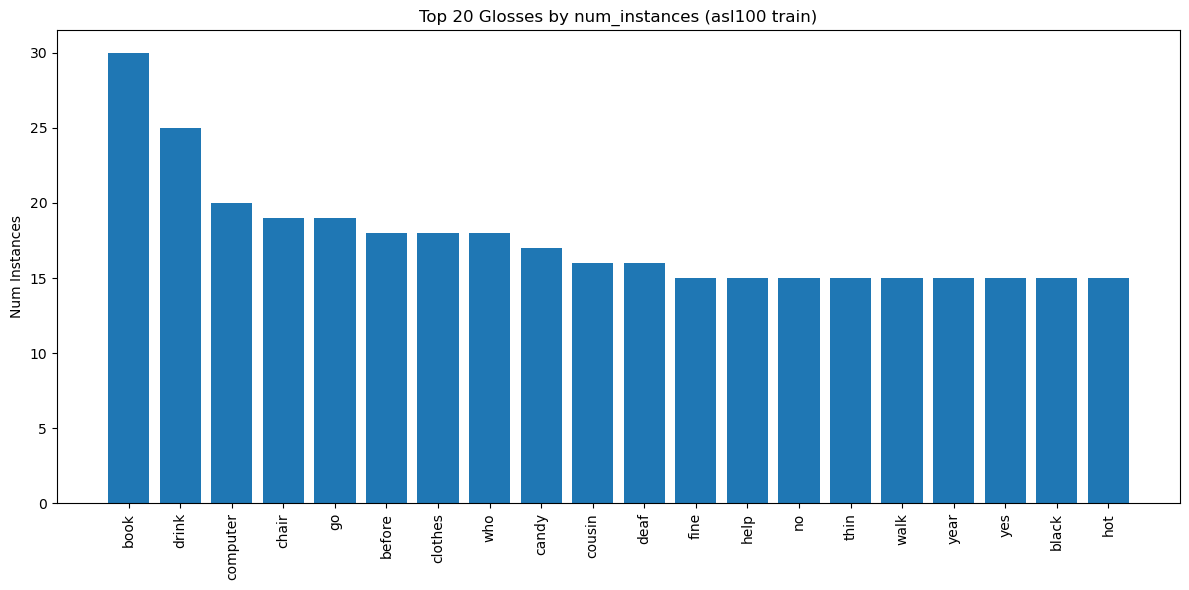

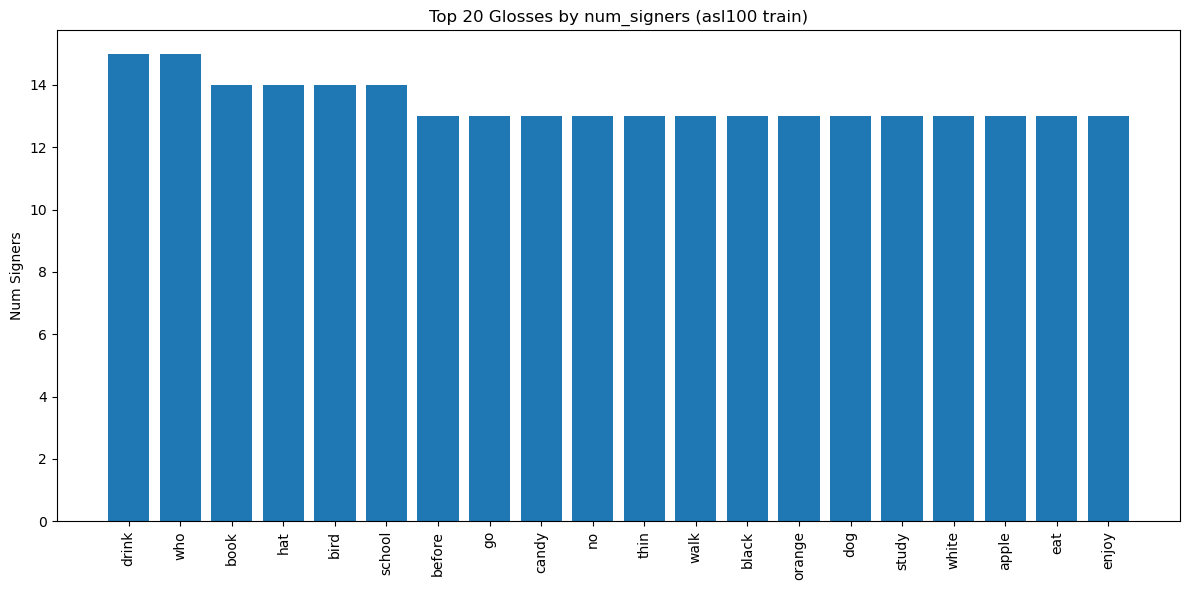

In [38]:
metric="num_instances"
barplot_metric(
    per_class=wlasl100_stats["per_set_stats"][set_name]["per_class_stats"],
    metric=metric,
    top_n=top_n,
    title=f"Top {top_n} Glosses by {metric} ({split_name} {set_name})"
)
metric="num_signers"
barplot_metric(
    per_class=wlasl100_stats["per_set_stats"][set_name]["per_class_stats"],
    metric=metric,
    top_n=top_n,
    title=f"Top {top_n} Glosses by {metric} ({split_name} {set_name})"
)

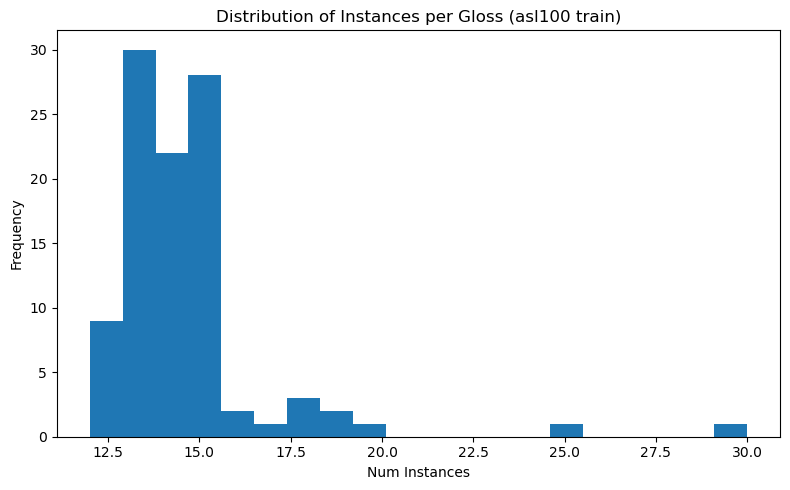

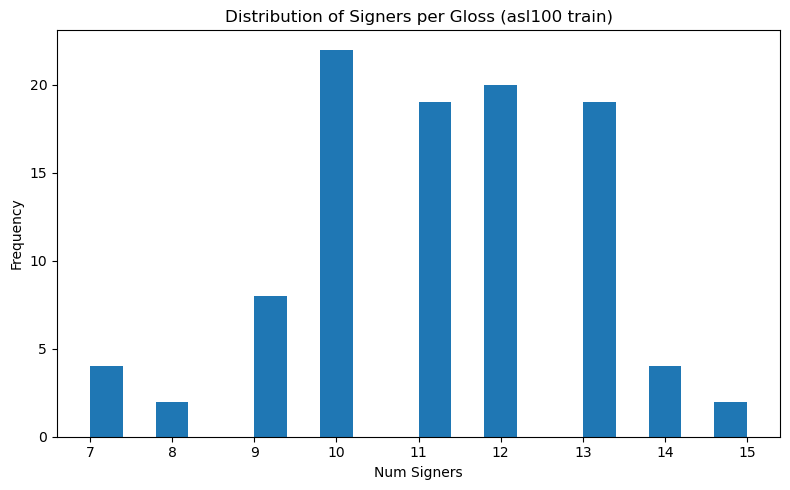

In [39]:
metric="num_instances"
histogram_metric(
    per_class=wlasl100_stats["per_set_stats"][set_name]["per_class_stats"],
    metric=metric,
    bins=20,
    title=f"Distribution of Instances per Gloss ({split_name} {set_name})"
)
metric="num_signers"
histogram_metric(
    per_class=wlasl100_stats["per_set_stats"][set_name]["per_class_stats"],
    metric=metric,
    bins=20,
    title=f"Distribution of Signers per Gloss ({split_name} {set_name})"
)

#### Val

In [40]:
set_name = 'val'

In [41]:
print(latex_set_summary_table(set_name, wlasl100_stats))

\begin{table}[h]
        \centering
        \begin{tabular}{lccc}
        \hline
        Set & Instances & Signers & Classes \\
        \hline
        train & 1442 & 91 & 100 \\
val & 338 & 69 & 100 \\
test & 258 & 56 & 100 \\
        \hline
        \end{tabular}
        \caption{Statistics summary for split val.}
        \end{table}


In [42]:
print(latex_class_stats_table(split_name=split_name, set_name=set_name, set_stats_obj=wlasl100_stats["per_set_stats"][set_name]))

\begin{table}[h]
        \centering
        \begin{tabular}{lccc}
        \hline
        Gloss & Instances & Signers & Variations \\
        \hline
        book & 6 & 3 & 1 \\
drink & 6 & 6 & 1 \\
computer & 5 & 4 & 3 \\
before & 4 & 4 & 2 \\
chair & 4 & 4 & 1 \\
go & 4 & 4 & 2 \\
clothes & 4 & 2 & 1 \\
who & 4 & 4 & 1 \\
candy & 4 & 4 & 2 \\
cousin & 4 & 4 & 1 \\
deaf & 4 & 4 & 1 \\
fine & 4 & 3 & 2 \\
help & 4 & 4 & 1 \\
no & 4 & 4 & 1 \\
thin & 4 & 4 & 2 \\
walk & 4 & 4 & 1 \\
year & 4 & 4 & 1 \\
yes & 4 & 4 & 1 \\
all & 4 & 4 & 2 \\
black & 3 & 3 & 1 \\
cool & 4 & 4 & 3 \\
finish & 4 & 4 & 2 \\
hot & 3 & 3 & 1 \\
like & 4 & 4 & 2 \\
many & 3 & 3 & 1 \\
mother & 3 & 3 & 1 \\
now & 3 & 3 & 1 \\
orange & 3 & 3 & 1 \\
table & 3 & 3 & 1 \\
thanksgiving & 3 & 3 & 2 \\
what & 4 & 4 & 2 \\
woman & 3 & 3 & 1 \\
bed & 3 & 3 & 1 \\
blue & 3 & 3 & 1 \\
bowling & 3 & 3 & 1 \\
can & 3 & 3 & 1 \\
dog & 3 & 3 & 2 \\
family & 3 & 3 & 1 \\
fish & 4 & 4 & 2 \\
graduate & 3 & 3 & 1 \\
hat & 3 & 3 & 1 

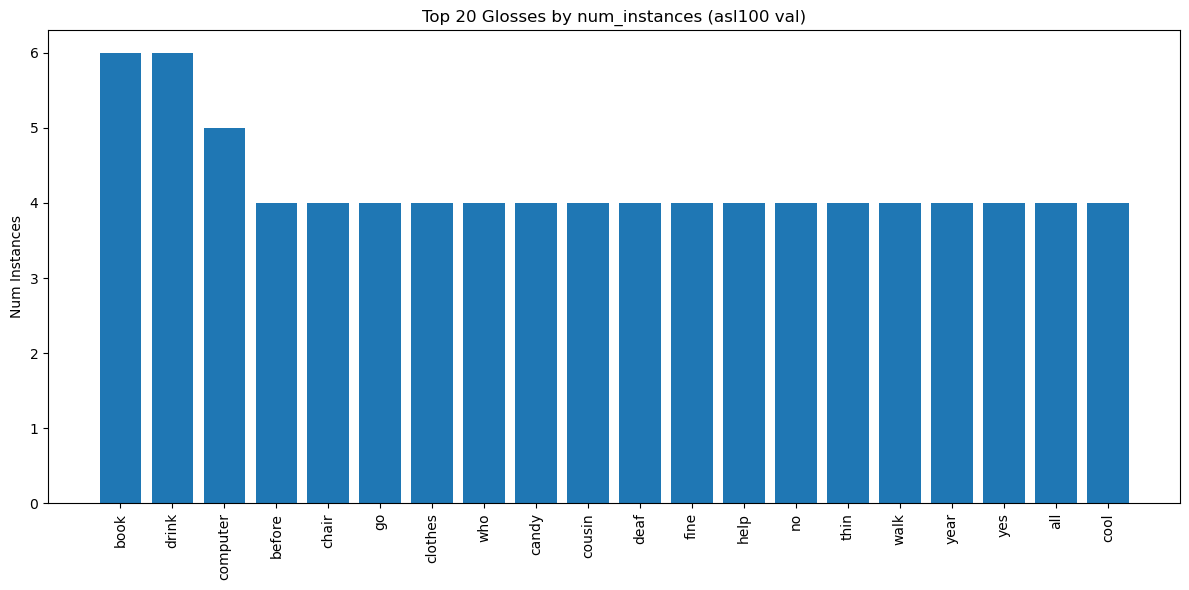

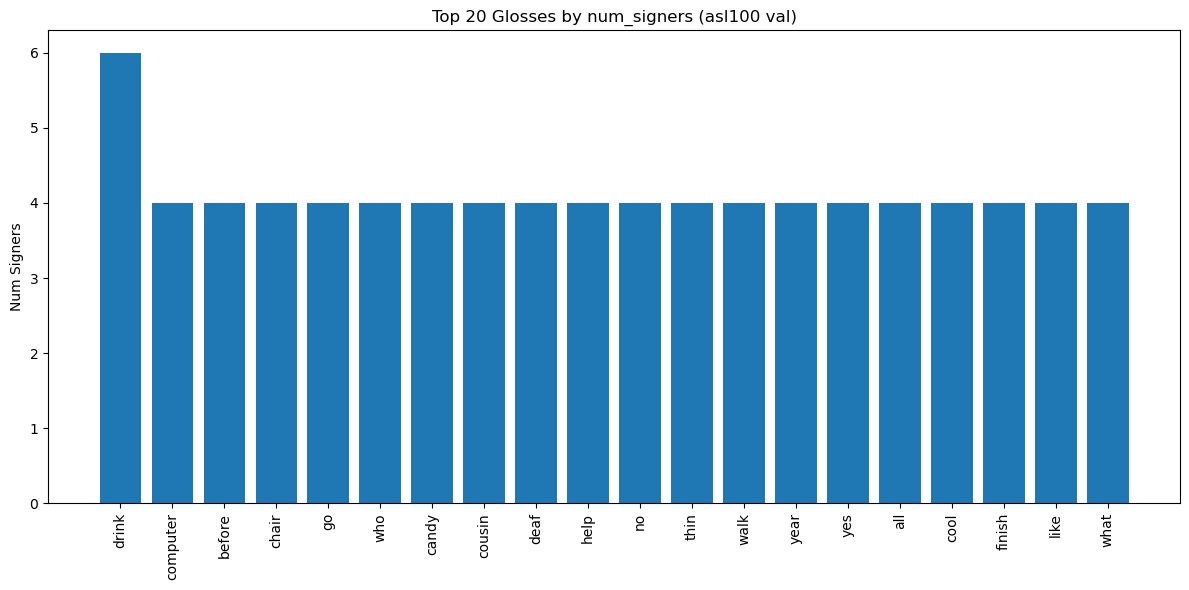

In [43]:
metric="num_instances"
barplot_metric(
    per_class=wlasl100_stats["per_set_stats"][set_name]["per_class_stats"],
    metric=metric,
    top_n=top_n,
    title=f"Top {top_n} Glosses by {metric} ({split_name} {set_name})"
)
metric="num_signers"
barplot_metric(
    per_class=wlasl100_stats["per_set_stats"][set_name]["per_class_stats"],
    metric=metric,
    top_n=top_n,
    title=f"Top {top_n} Glosses by {metric} ({split_name} {set_name})"
)

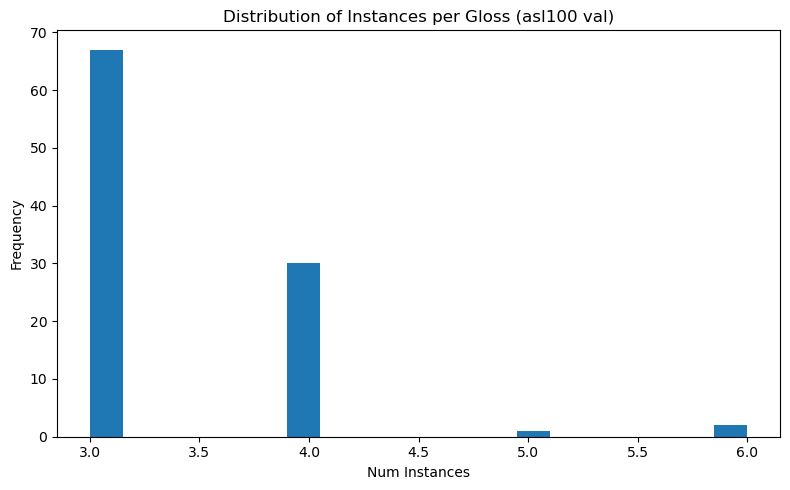

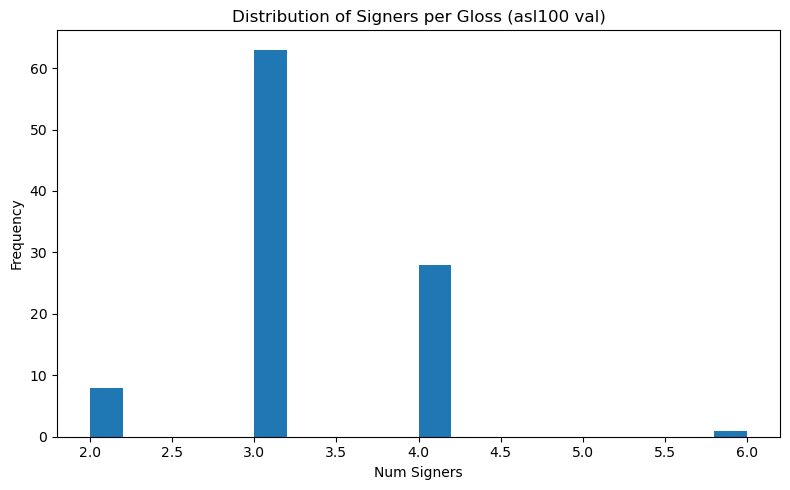

In [44]:
metric="num_instances"
histogram_metric(
    per_class=wlasl100_stats["per_set_stats"][set_name]["per_class_stats"],
    metric=metric,
    bins=20,
    title=f"Distribution of Instances per Gloss ({split_name} {set_name})"
)
metric="num_signers"
histogram_metric(
    per_class=wlasl100_stats["per_set_stats"][set_name]["per_class_stats"],
    metric=metric,
    bins=20,
    title=f"Distribution of Signers per Gloss ({split_name} {set_name})"
)

#### Test

In [45]:
set_name = 'test'

In [46]:
print(latex_set_summary_table(set_name, wlasl100_stats))

\begin{table}[h]
        \centering
        \begin{tabular}{lccc}
        \hline
        Set & Instances & Signers & Classes \\
        \hline
        train & 1442 & 91 & 100 \\
val & 338 & 69 & 100 \\
test & 258 & 56 & 100 \\
        \hline
        \end{tabular}
        \caption{Statistics summary for split test.}
        \end{table}


In [47]:
print(latex_class_stats_table(split_name=split_name, set_name=set_name, set_stats_obj=wlasl100_stats["per_set_stats"][set_name]))

\begin{table}[h]
        \centering
        \begin{tabular}{lccc}
        \hline
        Gloss & Instances & Signers & Variations \\
        \hline
        book & 4 & 3 & 1 \\
drink & 4 & 3 & 1 \\
computer & 5 & 4 & 3 \\
before & 4 & 4 & 2 \\
chair & 3 & 3 & 1 \\
go & 3 & 3 & 2 \\
clothes & 3 & 3 & 1 \\
who & 3 & 3 & 1 \\
candy & 3 & 3 & 2 \\
cousin & 3 & 3 & 1 \\
deaf & 3 & 3 & 1 \\
fine & 3 & 3 & 2 \\
help & 3 & 3 & 1 \\
no & 3 & 3 & 1 \\
thin & 3 & 3 & 2 \\
walk & 3 & 3 & 1 \\
year & 3 & 3 & 1 \\
yes & 3 & 3 & 1 \\
all & 3 & 3 & 2 \\
black & 3 & 3 & 1 \\
cool & 3 & 2 & 3 \\
finish & 3 & 3 & 2 \\
hot & 3 & 3 & 1 \\
like & 3 & 3 & 2 \\
many & 3 & 2 & 1 \\
mother & 3 & 3 & 1 \\
now & 3 & 3 & 1 \\
orange & 3 & 3 & 1 \\
table & 3 & 3 & 1 \\
thanksgiving & 3 & 3 & 2 \\
what & 3 & 3 & 2 \\
woman & 3 & 3 & 1 \\
bed & 2 & 2 & 1 \\
blue & 2 & 2 & 1 \\
bowling & 2 & 2 & 1 \\
can & 2 & 2 & 1 \\
dog & 3 & 3 & 2 \\
family & 2 & 2 & 1 \\
fish & 3 & 3 & 2 \\
graduate & 2 & 2 & 1 \\
hat & 2 & 2 & 1 

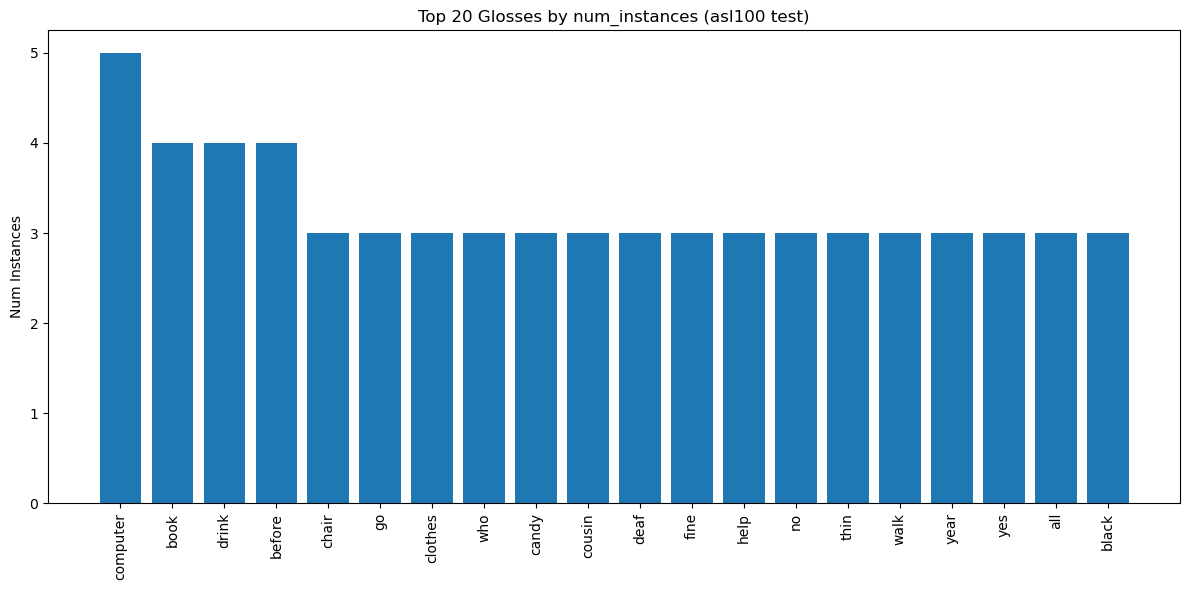

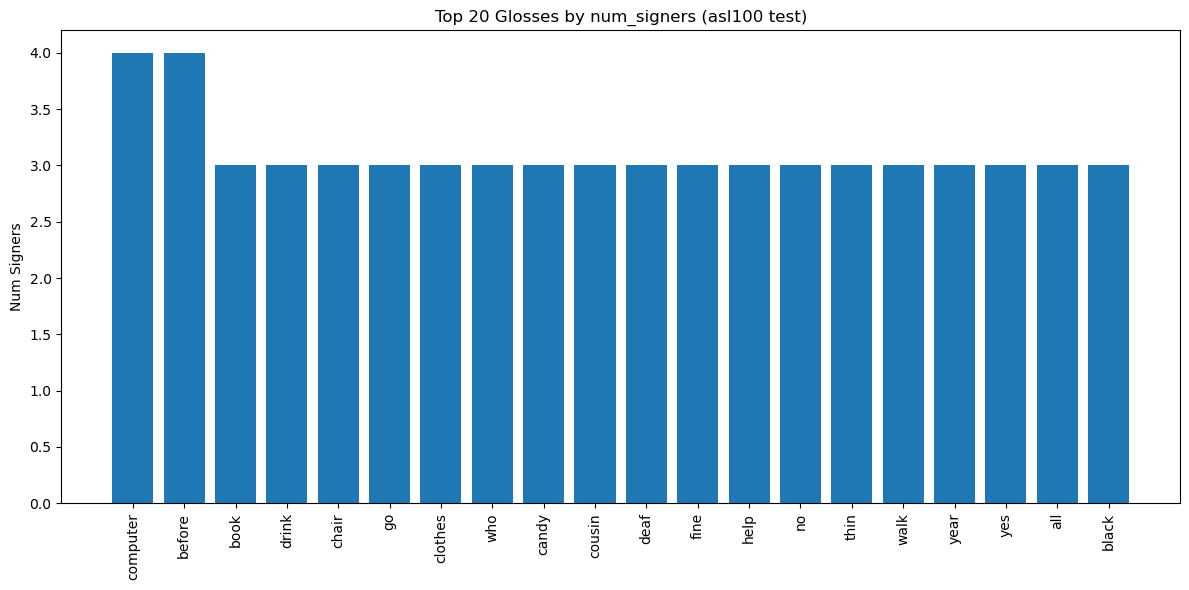

In [48]:
metric="num_instances"
barplot_metric(
    per_class=wlasl100_stats["per_set_stats"][set_name]["per_class_stats"],
    metric=metric,
    top_n=top_n,
    title=f"Top {top_n} Glosses by {metric} ({split_name} {set_name})"
)
metric="num_signers"
barplot_metric(
    per_class=wlasl100_stats["per_set_stats"][set_name]["per_class_stats"],
    metric=metric,
    top_n=top_n,
    title=f"Top {top_n} Glosses by {metric} ({split_name} {set_name})"
)

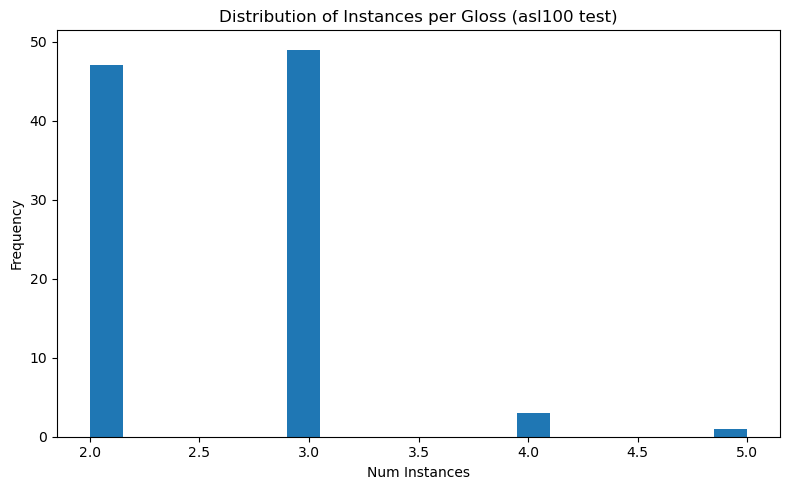

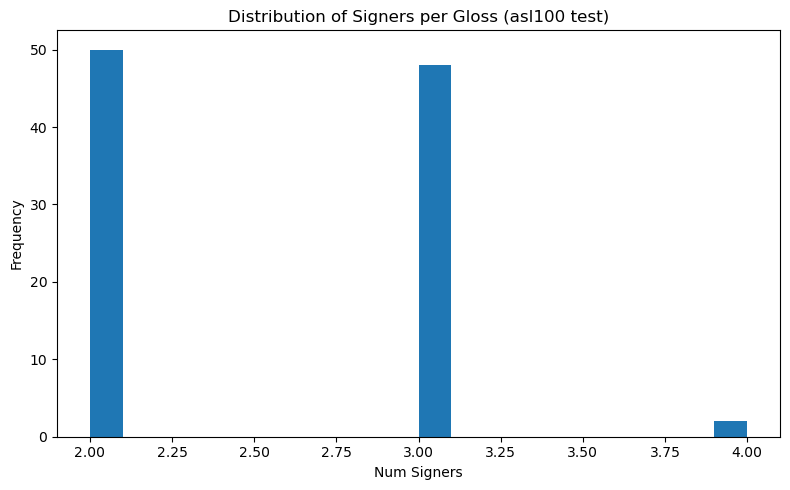

In [49]:
metric="num_instances"
histogram_metric(
    per_class=wlasl100_stats["per_set_stats"][set_name]["per_class_stats"],
    metric=metric,
    bins=20,
    title=f"Distribution of Instances per Gloss ({split_name} {set_name})"
)
metric="num_signers"
histogram_metric(
    per_class=wlasl100_stats["per_set_stats"][set_name]["per_class_stats"],
    metric=metric,
    bins=20,
    title=f"Distribution of Signers per Gloss ({split_name} {set_name})"
)